In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-09-19 12:23:54.224077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_X = pd.read_csv("Movie_collection_Independent.csv")
df_y = pd.read_csv("Movie_collection_Target.csv")

In [3]:
df_X.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [19]:
df_X.shape

(506, 19)

In [4]:
df_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [5]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(df_X.values,df_y.values,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_valid = scalar.fit_transform(X_valid)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(284, 19)

In [20]:
X_test.shape

(127, 19)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[19]), #Hidden layer 1
    keras.layers.Dense(30,activation="relu"), # Hidden layer 2
    keras.layers.Dense(1) # Output layer
    
])

2023-09-19 12:34:27.807201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-2), metrics=['mae'])

/Users/maddhujasen27/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("movie_model.h5",save_best_only=True)

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [14]:
model_history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),
                         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 2.7607 - mae: 1.4354 - val_loss: 1.2529 - val_mae: 0.8680
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8074 - mae: 0.6656 - val_loss: 0.7549 - val_mae: 0.6548
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6123 - mae: 0.5548 - val_loss: 0.6242 - val_mae: 0.5944
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5035 - mae: 0.4976 - val_loss: 0.5368 - val_mae: 0.5490
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4245 - mae: 0.4510 - val_loss: 0.4544 - val_mae: 0.5092
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3644 - mae: 0.4148 - val_loss: 0.4030 - val_mae: 0.4789
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3194 - mae: 0.3885 - val_loss: 0.3504 - val_mae: 0.4476
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2844 - mae: 0.3669 - va

In [15]:
model = keras.models.load_model("movie_model.h5")

In [16]:
mae_test = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 892us/step - loss: 0.1124 - mae: 0.2389


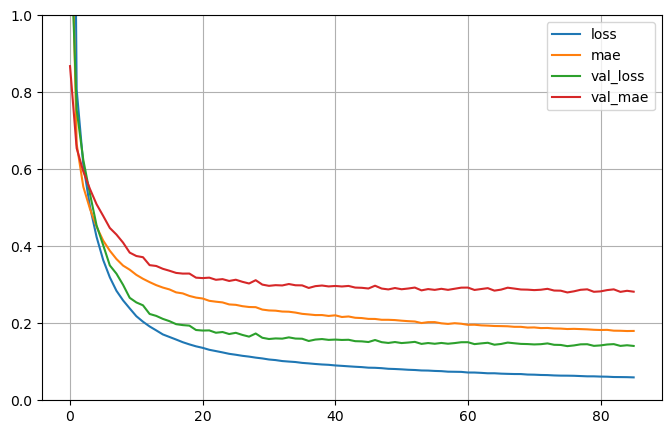

In [17]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
y_pred = model.predict(X_test[:5])
print(y_pred)
y_test[:5]

1/1 [==============================] - 0s 21ms/step
[[2.5221202]
 [2.907939 ]
 [1.9914775]
 [2.24261  ]
 [1.9675484]]


array([[2.24      ],
       [2.82666667],
       [1.57333333],
       [2.18666667],
       [1.74      ]])